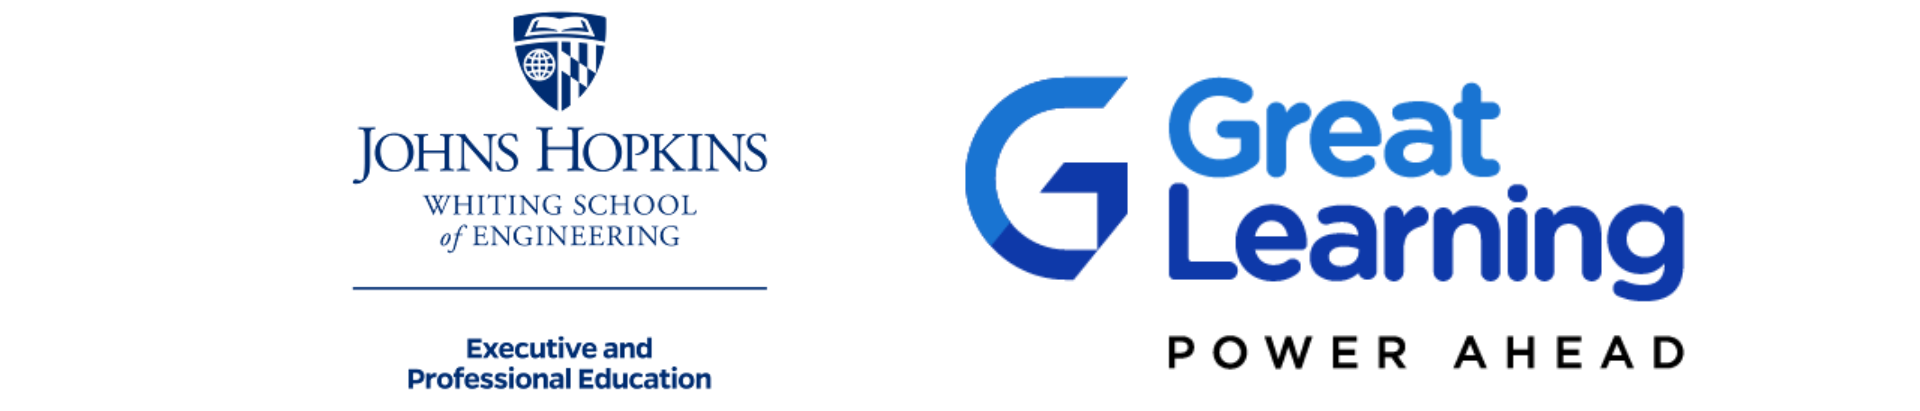

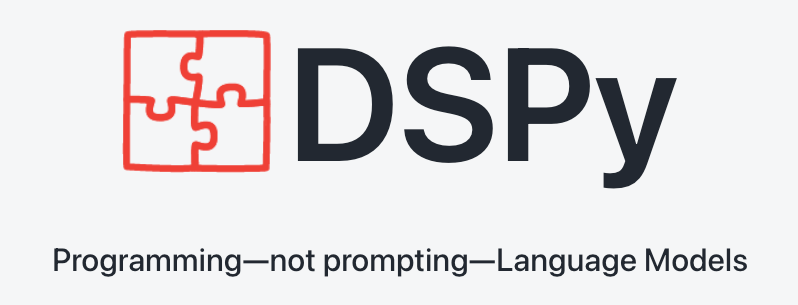

**Link : https://dspy.ai/**

# **DSPy Overview**



## **A) What is DSPy?**


DSPy (Declarative Self-improving Python) is a **declarative framework for building modular AI software**. Unlike traditional AI workflows that rely heavily on crafting prompt strings or managing training jobs, DSPy allows developers to **program AI behavior as structured, reusable modules**. It can compile high-level code into effective prompts and weight updates for language models, enabling systems ranging from simple classifiers to complex RAG pipelines and agent loops.  

In essence, DSPy is **a higher-level language for AI programming**, similar to the shift from assembly to C or from manual SQL queries to ORM-based development. It abstracts away low-level prompt management and makes AI systems more reliable, maintainable, and portable across different models and strategies.

## **B) Why DSPy – what it brings to the table?**


DSPy addresses common pain points in AI development:  

- **Reliability and maintainability**: Decouples AI system design from specific LMs or prompting strategies.  
- **Fast iteration**: Developers work with structured modules rather than fragile prompt strings.  
- **Modularity and composability**: Natural-language modules can be combined with different models, inference strategies, or learning algorithms.  
- **Optimization-ready**: DSPy includes **optimizers** to fine-tune prompts and model weights, improving performance based on metrics.  
- **Community-driven and open-source**: Users benefit from shared modules, architectures, and optimizers in a collaborative ecosystem.  

DSPy makes AI software **more ergonomic, portable, and performant**, while enabling rapid experimentation and evolution of AI systems.


## **C) Components of a DSPy Pipeline**

The DSPy pipeline follows a clear **workflow** from data to evaluation:

1. **Datasets** – Collections of representative inputs for a task.  
   - Used as the foundation for training, optimizing, and evaluating modules.  
   - Example: `HotPotQA` dataset for question-answering tasks.  

2. **Signatures** – Define the **input and output types** of a module.  
   - Example: `question -> answer: float` specifies the module takes a question and outputs a float.  
   - DSPy uses signatures to generate prompts and parse outputs automatically.  

3. **Modules** – Structured code blocks that define AI behavior.  
   - Examples: `dspy.Predict`, `dspy.ChainOfThought`, `dspy.ReAct`.  
   - Modules process inputs according to signatures and can be composed into pipelines.  

4. **Optimizers** – Improve module performance by refining prompts or tuning model weights.  
   - Examples: `dspy.BootstrapRS`, `dspy.GEPA2`, `dspy.MIPROv2`, `dspy.BootstrapFinetune`.  
   - Optimizers use datasets and metrics to systematically enhance modules.  

5. **Evaluation** – Measure module or pipeline performance against task-specific metrics.  
   - Examples: `dspy.evaluate.answer_exact_match`.  
   - Guides optimization and ensures improvements are objective and reproducible.


In [ ]:
# @title **Installing the dspy**
!pip install dspy==3.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.3/272.3 kB 12.6 MB/s eta 0:00:00


# **Learning Objectives**

We will focus on the most important DSPy components used in almost every pipeline:

1. **Signatures**  
2. **Modules**  


## **1. Signatures**


A **Signature** declaratively specifies the **input/output behavior** of a DSPy module. It tells the LM *what to do*, not *how to do it*. Field names matter, e.g., `question` vs `answer`.

**Benefits:**  
- Modular, reproducible, and adaptive LM behavior  
- Optimizes prompts or fine-tunes automatically  

**Data Types:**  
- Basic: `str`, `int`, `bool`  
- Complex: `list[str]`, `dict[str,int]`, `Optional[float]`  
- DSPy: `dspy.Image`, `dspy.History`  
- Custom types via `pydantic.BaseModel`

**Examples:**
```python
class SentimentSignature(dspy.Signature):
    # Input: the raw sentence
    sentence: str = dspy.InputField()
    
    # Output: whether the sentiment is positive or negative
    # The description ("True if positive...") guides the model's output format
    sentiment: bool = dspy.OutputField(desc="True if positive, False if negative")
```
```python
class QA_Signature(dspy.Signature):
    # Input: the context text where the answer might be found
    context: str = dspy.InputField()
    
    # Input: the actual user question
    question: str = dspy.InputField()
    
    # Output: the answer extracted/generated from the context
    # Description tells the model to answer based only on the context
    answer: str = dspy.OutputField(desc="Answer the question strictly using the context provided")
```

```python
class SummarizationSignature(dspy.Signature):
    # Input: a longer text document
    document: str = dspy.InputField()
    
    # Output: a short summary of the document
    # Description encourages brevity and clarity
    summary: str = dspy.OutputField(desc="1–2 sentence concise summary of the document")

```



## **2. Modules**

Modules implement LM behavior using signatures:

- **`dspy.Predict`** – Basic predictor, most common.  
- **`dspy.ChainOfThought`** – Step-by-step reasoning.  
- **`dspy.ProgramOfThought`** – Generates code whose output drives responses.  
- **`dspy.ReAct`** – Uses tools to fulfill signatures.  
- **`dspy.MultiChainComparison`** – Compares multiple outputs for final prediction.  

**Example: Summarization**
```python
document = "The 21-year-old made seven appearances..."
summarize = dspy.ChainOfThought('document -> summary')
response = summarize(document=document)
print(response.summary)
print("Reasoning:", response.reasoning)
```

Signatures + Modules + Data Types make DSPy pipelines **modular, reproducible, and optimized** for LMs.


## **LLM Configuration**

In [ ]:
import os
import json
import dspy
from typing import Literal

In [ ]:
# Load the JSON file and extract values
file_name = 'config.json'
with open(file_name, 'r') as file:
    config = json.load(file)
    os.environ['OPENAI_API_KEY'] = config.get("API_KEY") # Loading the API Key
    os.environ["OPENAI_BASE_URL"] = config.get("OPENAI_API_BASE") # Loading the API Base Url

In [ ]:
lm = dspy.LM(
    model='openai/gpt-4o-mini',
    temperature=0,
    api_key=os.environ['OPENAI_API_KEY'],
    api_base=os.environ['OPENAI_BASE_URL']
)
dspy.configure(lm=lm)

## **Structured Output Extraction**



Turn messy support emails into **structured tickets**.

**Goal:**  
Extract key information from emails such as:

- `subject` – The email subject line  
- `priority` – Urgency of the email (`low`, `medium`, `high`)  
- `product` – Product(s) mentioned  
- `negative_sentiment` – Whether the email expresses frustration  

**Output:**  
A clean, structured representation of each email for further processing or analysis.  


### **InputField vs OutputField in `dspy.Signature`**

- **`InputField`**  
  Used for values the model *receives* as input.  
  Example: the raw email text given to the system.  

- **`OutputField`**  
  Used for values the model should *predict or generate*.  
  Example: subject, priority, product, sentiment.  

### The `desc` Parameter
- `desc` lets you add a short description to guide the model.  
- Helps clarify expectations for the output.  
- Example:  
  ```python
  subject: str = dspy.OutputField(desc="Subject line of the email")
  negative_sentiment: bool = dspy.OutputField(desc="True/False")


In [ ]:
# ---- Define the task signature -----------------------------------------
class SupportEmail(dspy.Signature):
    # The raw email text provided as input
    email: str = dspy.InputField()

    # The subject line extracted/generated from the email
    subject: str = dspy.OutputField(desc="Subject line of the email")

    # The priority level of the support request (low, medium, or high)
    priority: Literal["low", "medium", "high"] = dspy.OutputField()

    # The product(s) referenced in the email (empty string if unknown)
    product: str = dspy.OutputField(
        desc="The product(s) referenced. Output an empty string if unknown."
    )

    # Indicates whether the email expresses negative sentiment (True/False)
    negative_sentiment: bool = dspy.OutputField(desc="True/False")

### **Predict Module**
The signature class is passed into `dspy.Predict`, creating a callable module that executes the DSPy pipeline with the defined input/output schema.


In [ ]:
# ---- Instantiate a Predict module --------------------------------------
# Create a prediction model based on the SupportEmail signature
extract_ticket = dspy.Predict(SupportEmail)

In the cell below, we define sample emails that will be converted into structured Tickets.

In [ ]:
sample_emails = [
    """
    Subject: Missing accessories in package

    Hi support,
    I just received my BetaPhone 5, but the charger and earphones were missing from the box.
    Please let me know how to get them sent.
    Regards,
    Mia
    """,
    """
    Subject: Refund request for order #4532

    Hello,
    I ordered a SmartWatch X3 last week, but it stopped working within two days.
    Can you process a refund?
    Thank you,
    Daniel
    """,
    """
    Subject: Feature suggestion

    Hey team,
    I love using your NoteMaster app! It would be awesome if you added a dark mode.
    Keep up the great work!
    Cheers,
    Alex
    """
]

In [ ]:
for raw in sample_emails:
    pred = extract_ticket(email=raw.strip())
    print("\n--- Structured Ticket ---")
    print(pred)



--- Structured Ticket ---
Prediction(
    subject='Missing accessories in package',
    priority='high',
    product='BetaPhone 5',
    negative_sentiment=True
)

--- Structured Ticket ---
Prediction(
    subject='Refund request for order #4532',
    priority='high',
    product='SmartWatch X3',
    negative_sentiment=True
)

--- Structured Ticket ---
Prediction(
    subject='Feature suggestion',
    priority='low',
    product='NoteMaster',
    negative_sentiment=False
)


### **Exploring "dspy" v/s Prompt Engineering**



We are curious whether the `dspy` tool completely eliminates the need for prompt engineering. Naturally, the question comes up: does it really make prompt engineering unnecessary?

The answer is **NO**! While `dspy` can assist in drafting prompts automatically, it doesn’t fully replace the guidance and creativity that prompt engineering provides.

To illustrate this, we can observe how `dspy` handles prompt creation on its own. By running:

```python
print(dspy.inspect_history())
```


we can access the **System Message**, **User Message**, and the **Response**. This allows us to see exactly how `dspy` interprets instructions, drafts prompts, and generates responses.

This demonstrates that while `dspy` is a helpful tool, understanding prompt design is still important for achieving the best results. In other words, prompt engineering remains a complementary skill, and examining the DSPy history gives us valuable insight into its internal process.




In [ ]:
print(dspy.inspect_history())





[2025-09-30T16:17:26.194263]

System message:

Your input fields are:
1. `email` (str):
Your output fields are:
1. `subject` (str): Subject line of the email
2. `priority` (Literal['low', 'medium', 'high']): 
3. `product` (str): The product(s) referenced. Output an empty string if unknown.
4. `negative_sentiment` (bool): True/False
All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## email ## ]]
{email}

[[ ## subject ## ]]
{subject}

[[ ## priority ## ]]
{priority}        # note: the value you produce must exactly match (no extra characters) one of: low; medium; high

[[ ## product ## ]]
{product}

[[ ## negative_sentiment ## ]]
{negative_sentiment}        # note: the value you produce must be True or False

[[ ## completed ## ]]
In adhering to this structure, your objective is: 
        Given the fields `email`, produce the fields `subject`, `priority`, `product`, `negative_sentiment`.


User message:

[[ ## email ## ]]
Subject: 

## **Financial Risk Assessment with Chain‑of‑Thought Module**



Assess loan applications and explain the **reasoning behind approvals or rejections**.

**Goal:**  
Determine the risk level of a loan applicant and whether they should be approved. The system uses a chain-of-thought approach to provide interpretable reasoning. Key outputs include:

- `loan_risk` – The risk category of the applicant (`low`, `medium`, `high`)  
- `approved` – Boolean indicating if the applicant should be approved  
- *(Optional explanation via the chain-of-thought reasoning for transparency)*  

**Input:**  
Applicant profile including details such as credit score, income, existing debt, requested amount, and loan purpose.

**Output:**  
A structured, interpretable assessment of the loan application, suitable for decision-making or further analysis.


In [ ]:
# Define a structured signature for the loan risk assessment
class LoanRisk(dspy.Signature):
    # Input: Full profile of the applicant as a string
    applicant_profile: str = dspy.InputField()

    # Output: Risk level of the applicant, restricted to 'low', 'medium', or 'high'
    loan_risk: Literal["low", "medium", "high"] = dspy.OutputField()

    # Output: Whether the applicant should be approved for a loan
    approved: bool = dspy.OutputField(desc="approve this person for a loan?")


### **ChainOfThought Module**
The signature class is passed into `dspy.ChainOfThought`, creating a callable module that executes the DSPy pipeline with the defined input/output schema.


In [ ]:
#  Using the structured LoanRisk signature with chain-of-thought reasoning
risk_checker = dspy.ChainOfThought(LoanRisk)

Below, we define a sample profile that we are going to run the financial risk assessment with the dspy based `risk_checker` that uses `ChainOfThought` module with defined signatures:

In [ ]:
sample_profile = """Name: Mark Rivera
Credit score: 680
Annual income: $92k
Existing debt: $40k
Requested amount: $30k
Loan purpose: home improvement
"""

### **Unexpected `reasoning` Field in ChainOfThought Output**

While running the financial risk assessment with the `ChainOfThought` module, we noticed that the prediction included a `reasoning` field, even though we did not define this field in our signature.  

#### **Why This Happens**

The `ChainOfThought` module is designed to provide **step-by-step reasoning** alongside its predictions. This means:

- Even if the signature does not explicitly include a `reasoning` field, the module can automatically attach it to the output.
- The signature defines the expected structured output, but some modules can include additional metadata or explanatory fields to improve interpretability.
- In this case, `reasoning` is generated by the module to show **why** it labeled the loan risk as medium.



In [ ]:
pred = risk_checker(applicant_profile=sample_profile, age=26, is_male="YES")
print(pred)

Prediction(
    reasoning='Mark Rivera has a credit score of 680, which is considered fair. His annual income of $92k is solid, but he has existing debt of $40k. The requested loan amount of $30k is significant compared to his income and existing debt. This situation indicates a moderate risk, as he has a reasonable income but also a considerable amount of existing debt relative to his income. Therefore, while he may be able to manage the loan, there is a risk involved in approving this loan.',
    loan_risk='medium',
    approved=False
)


This can be verified using the `inspect_history()` function from the dspy module. By examining the prompt, we can see why a reasoning field is included.

In [ ]:
print(dspy.inspect_history())





[2025-09-30T16:17:29.376320]

System message:

Your input fields are:
1. `applicant_profile` (str):
Your output fields are:
1. `reasoning` (str): 
2. `loan_risk` (Literal['low', 'medium', 'high']): 
3. `approved` (bool): approve this person for a loan?
All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## applicant_profile ## ]]
{applicant_profile}

[[ ## reasoning ## ]]
{reasoning}

[[ ## loan_risk ## ]]
{loan_risk}        # note: the value you produce must exactly match (no extra characters) one of: low; medium; high

[[ ## approved ## ]]
{approved}        # note: the value you produce must be True or False

[[ ## completed ## ]]
In adhering to this structure, your objective is: 
        Given the fields `applicant_profile`, produce the fields `loan_risk`, `approved`.


User message:

[[ ## applicant_profile ## ]]
Name: Mark Rivera
Credit score: 680
Annual income: $92k
Existing debt: $40k
Requested amount: $30k
Loan purpose: home 

### **Demonstrating Field Extraction in DSPy**

We can illustrate `dspy`'s field extraction capability using the `Prediction` output from the `ChainOfThought` module. Instead of returning a single unstructured block of text, `dspy` extracts **specific fields** as defined in the signature.

For example, consider the following prediction:

- **Reasoning:**  
  Jane has a credit score of 612, which is considered fair but below the typical threshold for favorable loan terms. Her annual income of \$84k is decent, but she has existing debt of $55k, which is significant compared to her income. The requested amount of \$25k for consolidating credit cards suggests she is looking to manage her debt, but her current debt-to-income ratio raises concerns about her ability to repay additional debt. Overall, these factors indicate a medium risk for loan approval.

- **Loan Risk:** `medium`  
- **Approved:** `False`

#### **Key Points**

- Instead of dumping the entire reasoning as a free-form text blob, `dspy` isolates the three key fields: `reasoning`, `loan_risk`, and `approved`.
- This structured output is easier to interpret, process programmatically, and use in dashboards or reporting.
- It ensures consistency and reliability for downstream applications, making it a significant improvement over traditional LLM outputs.

With `dspy`, each prediction can provide **clean, structured data** rather than an unstructured text blob, enabling better automation, transparency, and usability.


In [ ]:
print(pred.reasoning)
print(pred.loan_risk)
print(pred.approved)

Mark Rivera has a credit score of 680, which is considered fair. His annual income of $92k is solid, but he has existing debt of $40k. The requested loan amount of $30k is significant compared to his income and existing debt. This situation indicates a moderate risk, as he has a reasonable income but also a considerable amount of existing debt relative to his income. Therefore, while he may be able to manage the loan, there is a risk involved in approving this loan.
medium
False


## **Inline definition of Signature**



In DSPy, a module can directly use an **inline signature** to define what inputs it expects and what outputs it produces. This is typically done in the module's `__init__` method.

### **1. Defining the Predictor in `__init__`**

- The module's constructor (`__init__`) creates a **Predict module** using an **inline signature**.  
- Example schema: `"question -> response"`  
  - **Input:** `question` (string) — this is the data the LLM will process.  
  - **Output:** `response` (string) — this is the value the LLM will generate.  
- This inline signature defines the **task contract** for the module without needing a separate `Signature` class.

### **2. Passing Inputs in `forward`**

- The module’s `forward` method receives the input (e.g., `question`) as an argument.  
- It calls the predictor defined in `__init__`, passing the inputs as keyword arguments.  
- The predictor uses the inline signature to understand which fields are inputs and which are outputs.  
- The method then returns the relevant output (e.g., `response`) extracted from the predictor’s result.

### **3. Key Points**

- The **inline signature** serves as a mini "contract" between the module and the LLM: it tells the LLM what to expect and what to produce.  
- By defining it in `__init__`, the module encapsulates the prediction logic.  
- The `forward` method acts as the **execution step**, feeding inputs into the predictor and returning outputs.  

This approach is simple and ideal for **single-step LLM tasks**, where you want to wrap a prediction call in a reusable module without extra boilerplate.


In [ ]:
class callLLM(dspy.Module):  # This is a DSPy module
    """
    A simple module that directly invokes the LLM using a signature.

    - Inputs: "question" (str)
    - Outputs: "response" (str)
    - Uses a Predict module internally with a signature defined inline.
    """
    def __init__(self):
        # Define a predictor inline: expects "question" as input and returns "response"
        self.response_function = dspy.Predict("question -> response")  # Inline signature

    def forward(self, question: str):
        # Directly call the predictor with the input question
        result = self.response_function(question=question)
        return result.response

In [ ]:
callLLM = callLLM()

In [ ]:
callLLM("Who are you?")

'I am an AI language model created by OpenAI, designed to assist with a variety of questions and tasks by providing information and generating text based on the input I receive.'